# **W1D1: Introduction to the Climate System and Xarray**

## Overview

In tutorials 4 to 9 of today, we will introduce various tools within [Xarray](https://xarray.dev/) to help us analyze and interpret climate data, such as sea surface temperature data. 

We'll cover these topics:

1. Arithmetic and Aggregation Methods
1. `groupby` operation to enable **split-apply-combine** workflow
1. `.weighted()` method
1. `resample`, `rolling`, and `coarsen` methods
1. Masking data using `xr.where()` or `.where()` method

# **Tutorial 7: Other Computational Tools in Xarray**

**Week 1, Day 1, Introduction to the Climate System**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Ohad Zivan

**Content editors:** Agustina Pesce

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS





### **Code and Data Sources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).

# **Tutorial 7 Objectives**
Thus far, we've learned about various climate processes in the videos, and we've explored tools in Xarray that are useful for analyzing and interpretting climate data. 

In this tutorial we'll continue using the SST data from CESM2 and we'll practice using some additional computational tools in Xarray to interpret climate data. Specifically, we will learn three tools that allow us to resample our data, which can help will data comparison and analysis.

- `resample`: Groupby-like functionality specifically for time dimensions. Can be used for temporal upsampling and downsampling. Additional information about resampling in Xarray can be found [here](https://xarray.pydata.org/en/stable/user-guide/time-series.html#resampling-and-grouped-operations).
- `rolling`: Useful for computing aggregations on moving windows of your dataset e.g. computing moving averages. Additional information about resampling in Xarray can be found [here](https://xarray.pydata.org/en/stable/user-guide/computation.html#rolling-window-operations).
- `coarsen`: Generic functionality for downsampling data. Additional information about resampling in Xarray can be found [here](https://xarray.pydata.org/en/stable/user-guide/computation.html#coarsen-large-arrays).

In [9]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# Setup


In [10]:
# !pip install matplotlib.pyplot
# !pip install numpy
# !pip install xarray
# !pip install pythia_datasets
# !pip install pandas

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd

In [12]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

ModuleNotFoundError: No module named 'ipywidgets'

Let's load the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [13]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath,decode_times=False)
new_time = pd.date_range(start='2000-01-15', end='2014-12-15', periods=180)
ds = ds.assign(time=new_time)

/Users/chi/miniconda3/lib/python3.10/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


# Section 1: High level computation functionality

- `resample`: [Groupby-like functionality specifialized for time dimensions. Can be used for temporal upsampling and downsampling](https://xarray.pydata.org/en/stable/user-guide/time-series.html#resampling-and-grouped-operations)
- `rolling`: [Useful for computing aggregations on moving windows of your dataset e.g. computing moving averages](https://xarray.pydata.org/en/stable/user-guide/computation.html#rolling-window-operations)
- `coarsen`: [Generic functionality for downsampling data](https://xarray.pydata.org/en/stable/user-guide/computation.html#coarsen-large-arrays)



## Section 1.1: Resampling data

For upsampling or downsampling temporal resolutions, we can use the `resample()` method in Xarray.  For example, you can use this function to downsample a dataset from hourly to 6-hourly resolution.

Our original SST data is monthly resolution. Let's use `resample()` to downsample to annual frequency:

In [14]:
#Resample to an annual frequency
r = ds.tos.resample(time='AS')
r

DataArrayResample, grouped over '__resample_dim__'
15 groups with labels 2000-01-01, ..., 2014-01-01.

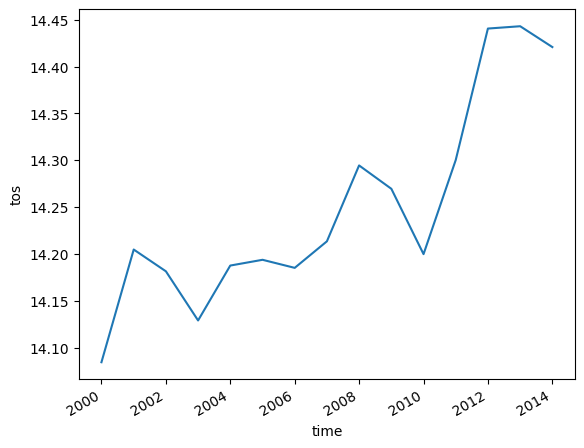

In [15]:
#Calculate the global mean of the resampled data
annual_mean = r.mean()
annual_mean_global = annual_mean.mean(dim=['lat', 'lon'])
annual_mean_global.plot()

## Section 1.2: Moving average

The `rolling()` method allows for a rolling window aggregation and is applied along one dimension using the name of the dimension as a key (e.g. time) and the window size as the value (e.g. 6).

Let's use the `rolling()` function to compute a 6-month moving average of our SST data:

In [16]:
#Calculate the running mean
m_avg = ds.tos.rolling(time=6, center=True).mean()
m_avg

<xarray.DataArray 'tos' (time: 180, lat: 180, lon: 360)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 ... 2014-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

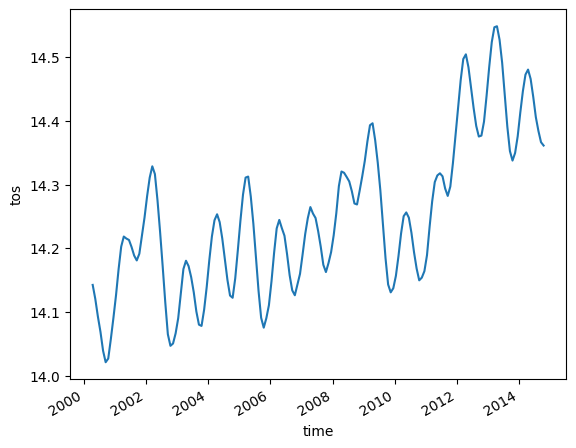

In [17]:
#Calculate the global average of the running mean
m_avg_global = m_avg.mean(dim=['lat','lon'])
m_avg_global.plot()

## Section 1.3: Coarsening the data

The `coarsen()` function allows for block aggregation along multiple dimensions. For example, you could take a block mean for every 7 days along time dimension and every 2 points along x dimension.

Let's use the `coarsen()` function to take a block mean for every 4 months and globally (i.e., 180 points along the latitude dimension and 360 points along the longitude dimension):

In [18]:
#Coarsen the data
coarse_data = ds.coarsen(time=4,lat=180,lon=360).mean()
coarse_data

<xarray.Dataset>
Dimensions:    (time: 45, d2: 2, lat: 1, lon: 1)
Coordinates:
  * time       (time) datetime64[ns] 2000-02-29T15:41:13.743016759 ... 2014-1...
  * lat        (lat) float64 0.0
  * lon        (lon) float64 180.0
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) float64 7.297e+05 7.297e+05 ... 7.35e+05 7.351e+05
    lat_bnds   (lat, d2) float64 -0.5 0.5
    lon_bnds   (lon, d2) float64 179.5 180.5
    tos        (time, lat, lon) float32 14.21 14.06 13.99 ... 14.55 14.41 14.3
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

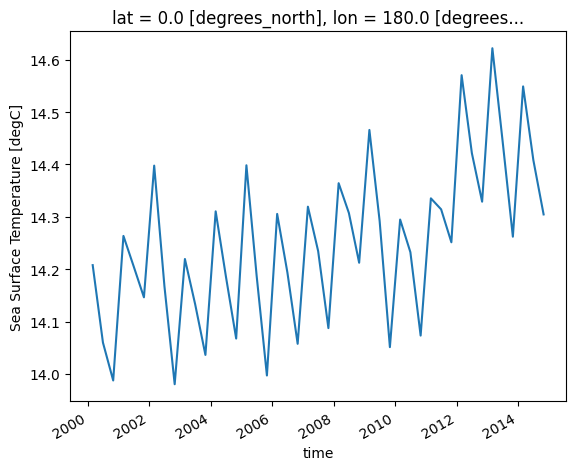

In [19]:
coarse_data.tos.plot()

## Section 1.4: Compare the resampling methods

Now that we've tried multiple resampling methods on different temporal resolutions, we can compare the resampled datasets to the original.

In [20]:
original_global = ds.mean(dim=['lat', 'lon'])

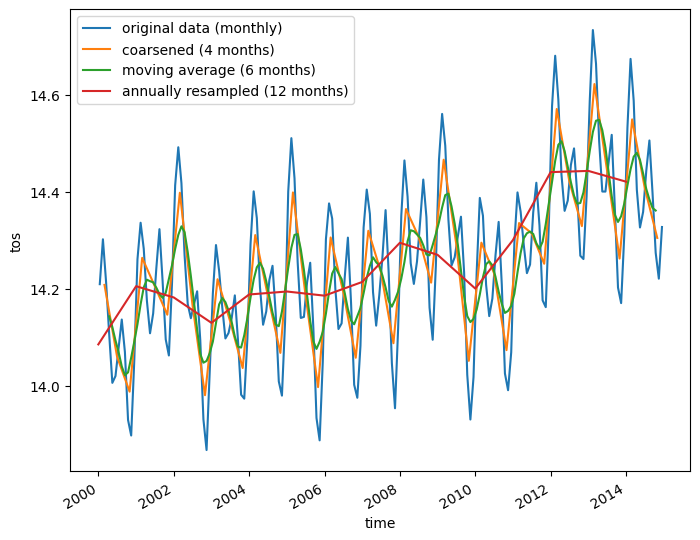

In [24]:
original_global.tos.plot(size=6)
coarse_data.tos.plot()
m_avg_global.plot()
annual_mean_global.plot()


plt.legend(['original data (monthly)','coarsened (4 months)','moving average (6 months)', 'annually resampled (12 months)']);

# Section 2: Climate Connection 

- What type of information can you obtain from each time series?
- In what scenarios would you use different temporal resolutions?
- What conclusions about the monthly, annual and decadal variability in global SST can you draw from this plot?


In [25]:
# to_remove explanation

"""
In general, by examining the data at these different time scales, you can get a more comprehensive understanding of the SST variations and their potential causes. Original monthly data gives you the most granular view of the data, allowing you to see monthly variations in SST. Coarsening the data over 4-month periods reduces the temporal resolution but provides a slightly smoothed series that could help identify patterns or trends over this larger time period. A 6-month moving average could be useful for identifying semi-annual trends and reducing the impact of short-term noise in the data. The annually resampled (12 months) data provides a high-level view of the SST data, emphasizing the annual pattern. This can be useful for identifying long-term trends or changes in the data over the span of years. 
"""

'\nIn general, by examining the data at these different time scales, you can get a more comprehensive understanding of the SST variations and their potential causes. Original monthly data gives you the most granular view of the data, allowing you to see monthly variations in SST. Coarsening the data over 4-month periods reduces the temporal resolution but provides a slightly smoothed series that could help identify patterns or trends over this larger time period. A 6-month moving average could be useful for identifying semi-annual trends and reducing the impact of short-term noise in the data. The annually resampled (12 months) data provides a high-level view of the SST data, emphasizing the annual pattern. This can be useful for identifying long-term trends or changes in the data over the span of years. \n'

# Summary

In this tutorial, we've explored Xarray tools to simplify and understand climate data better. Given the complexity and variability of climate data, tools like `resample`, `rolling`, and `coarsen` come handy in making the data easier to compare and find long-term trends. We've also looked at valuable techniques like calculating moving averages. 



